# Post EDA
### This notebook can be used to investigate the model performance in different sub sets of the data.
### e.g. the materials, temperatures, frequencies, ...

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from utils.metrics import calculate_metrics
import os

plt.style.use("default")
plt.rcParams.update({
    #"text.usetex": False,
    #"font.family": "serif",
    #"font.serif": ["Helvetica"],
    'figure.dpi': 200,  # renders images larger for notebook
    'axes.grid': True,
    'grid.alpha': 0.3,

})

DATA_SOURCE = Path.cwd().parent / 'data' / 'additional_data' / 'ploss_pred_cnn_gbm' / 'ploss_pred_cnn_gbm'


# Read the single csv files in one dataframe
files_in_destination = os.listdir(DATA_SOURCE)
data = pd.DataFrame()
for filename in files_in_destination:
    df_mat = pd.read_csv(os.path.join(DATA_SOURCE, filename))
    df_mat['material'] = filename[0:-4].split('_')[3]
    data = pd.concat([data, df_mat], ignore_index=True)

print(list(data.columns))

['freq', 'temp', 'ploss', 'wav_other', 'wav_square', 'wav_triangular', 'wav_sine', 'kfold', 'log_freq', 'b_fft_mean', 'log_peak2peak', 'log_mean_abs_dbdt', 'form_fac', 'log_h_peak2peak', 'log_mean_abs_dhdt', 'p_derived_from_h', 'log_p_derived_from_h', 'ploss_pred', 'material']


# Temperature

[]

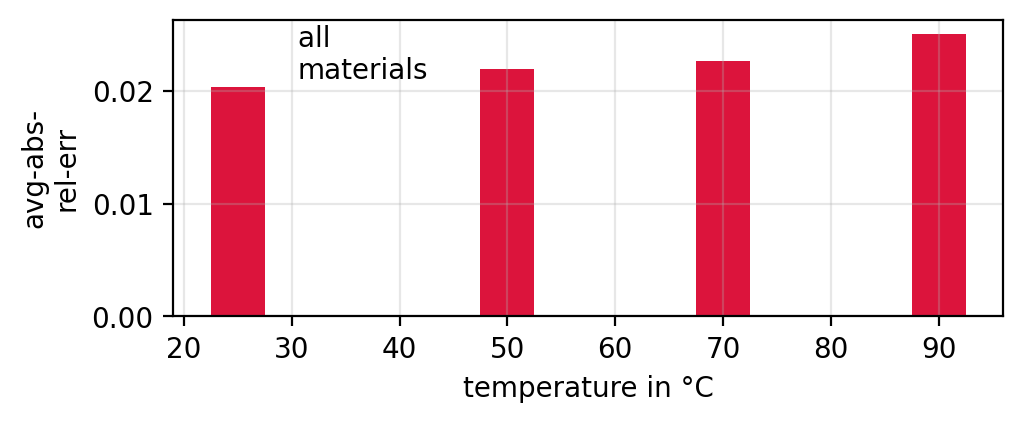

In [65]:
fig, axes = plt.subplots(layout='constrained', figsize=(5,2), sharex=False, sharey=False)
temperatures = data["temp"].unique()

for temp_lbl, temp_df in data.groupby("temp"):
    metrics_temp = calculate_metrics(pred=temp_df["ploss_pred"], gtruth=temp_df["ploss"])
    axes.bar(temp_lbl, metrics_temp['avg-abs-rel-err'], color="crimson", width=5, align='center')
axes.text(0.15, 0.8, s="all \nmaterials", transform=axes.transAxes )
axes.set_ylabel('avg-abs-\nrel-err')
axes.set_xlabel("temperature in °C")
plt.plot()

[]

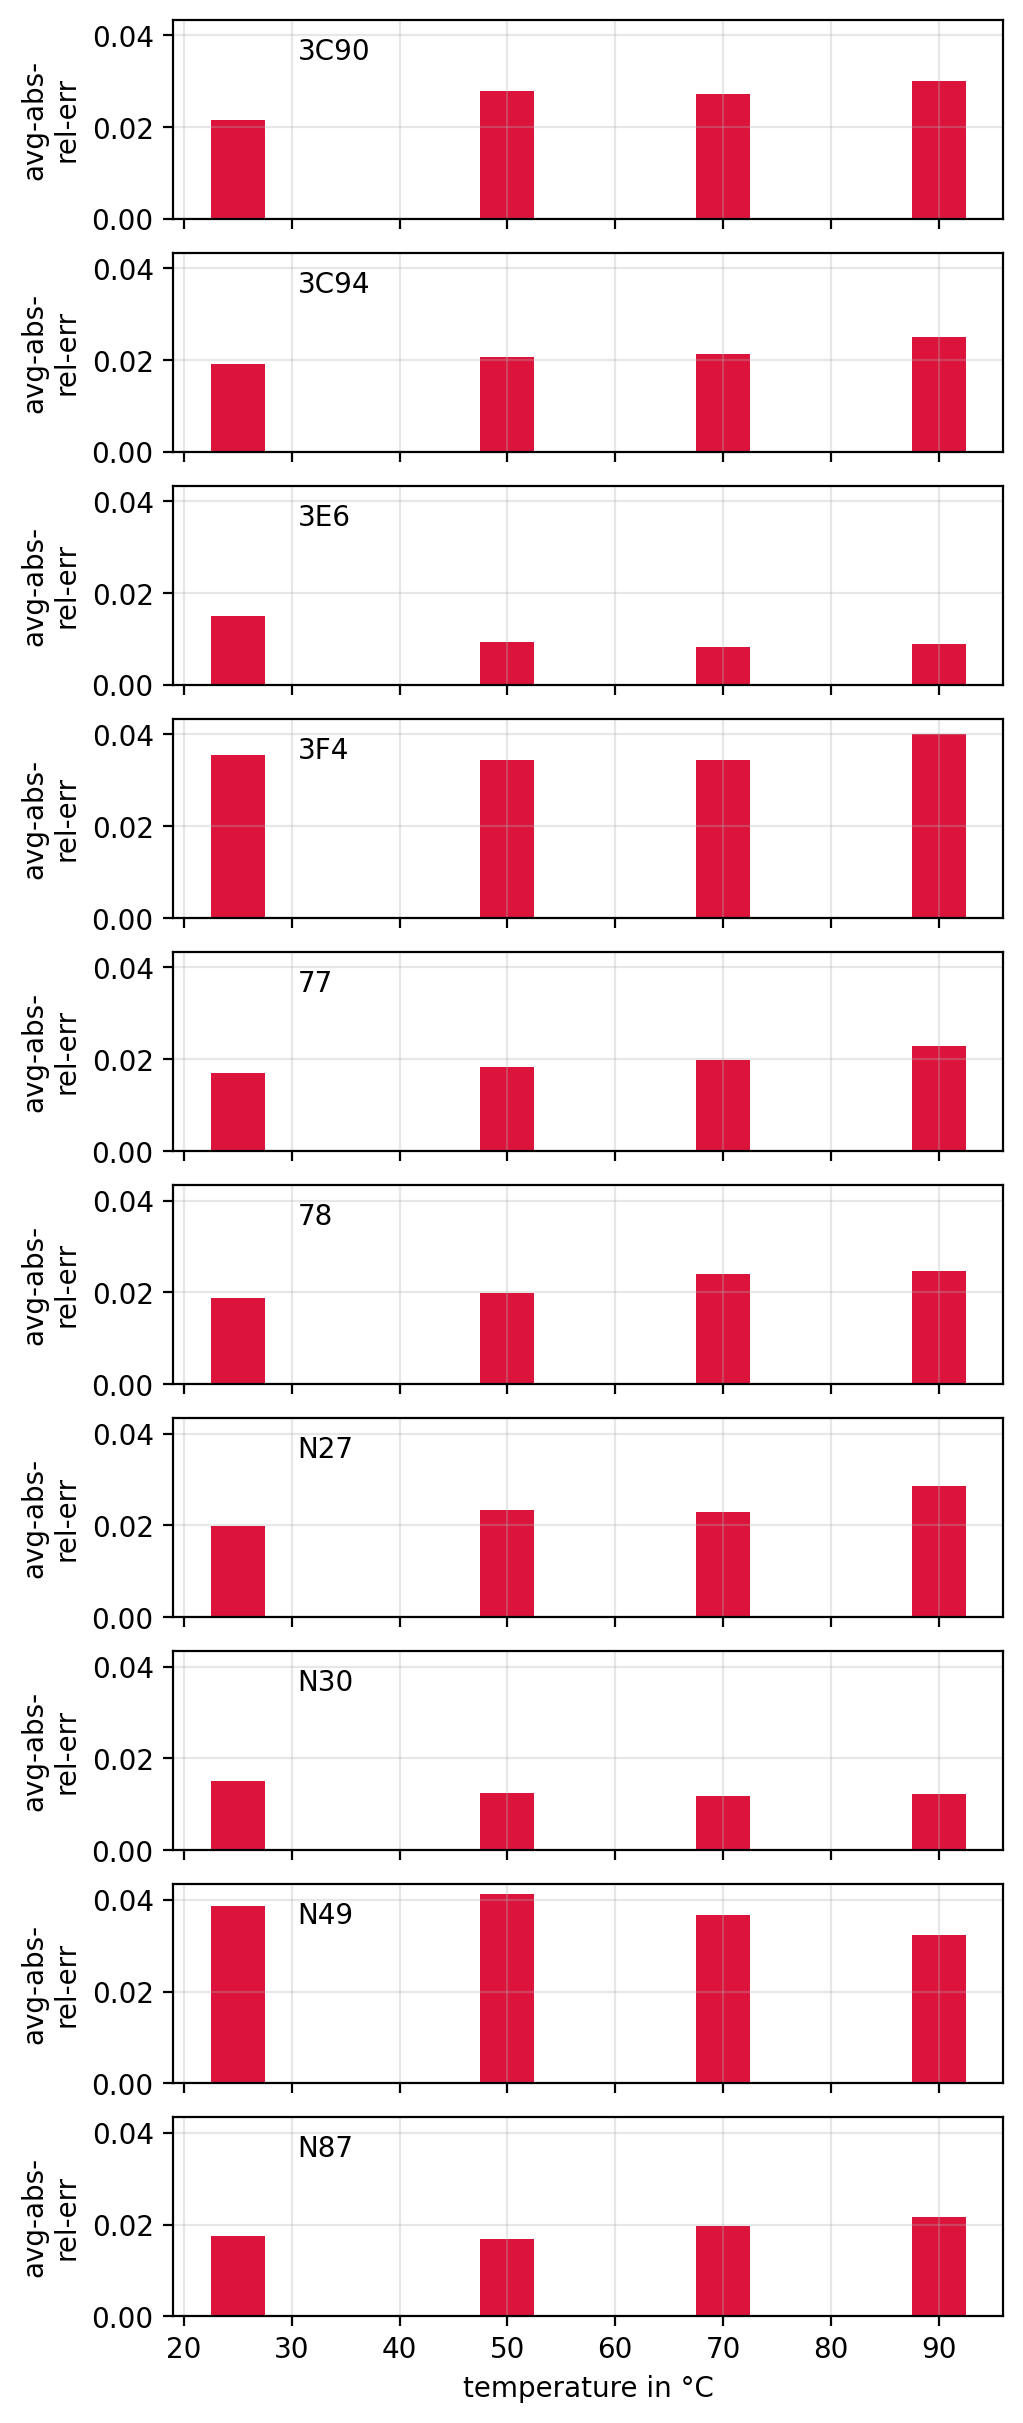

In [67]:
temperatures = data["temp"].unique()
materials = data["material"].unique()
fig, axes = plt.subplots(len(materials), layout='constrained', figsize=(5,12), sharex=True, sharey=True)

for ax, (mat_lbl, mat_df) in zip(axes, data.groupby("material")):
    ax.text(0.15, 0.8, s=mat_lbl, transform=ax.transAxes )
    for temp_lbl, temp_df in mat_df.groupby("temp"):
        metrics_temp = calculate_metrics(pred=temp_df["ploss_pred"], gtruth=temp_df["ploss"])
        ax.bar(temp_lbl, metrics_temp['avg-abs-rel-err'], color="crimson", width=5, align='center')
    ax.set_ylabel('avg-abs-\nrel-err')
axes[-1].set_xlabel("temperature in °C")
axes[0].set_title("")
plt.plot()

# Waveform

['other', 'square', 'triangular', 'sine'] [0.02393232 0.02828127 0.0218819  0.02755636]
['other', 'square', 'triangular', 'sine'] [0.02186477 0.02776678 0.02227276 0.03555116]


Text(0, 0.5, 'avg-abs-rel-err in %')

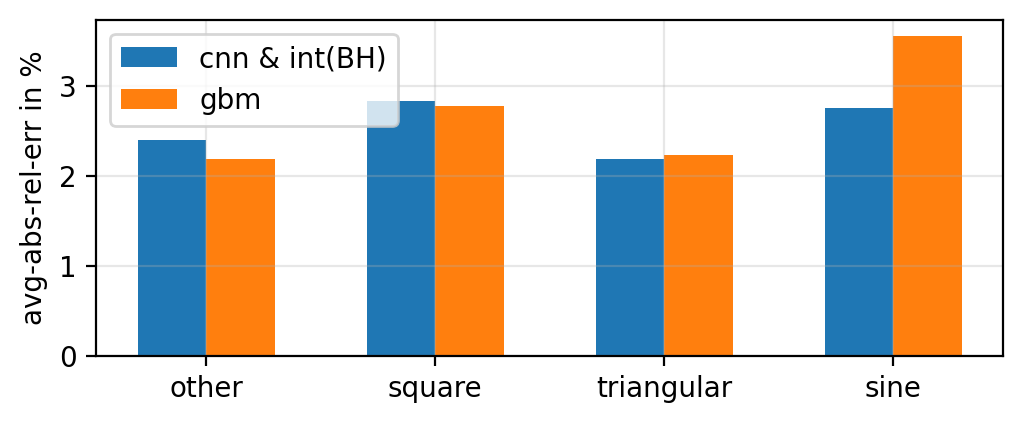

In [69]:
files_in_destination = os.listdir(DATA_SOURCE)
wav_labels = ["other", "square", "triangular", "sine"]

wav_abs_errors_cnn = [0, 0, 0, 0]
wav_abs_errors_gbm = [0, 0, 0, 0]

fig, ax = plt.subplots(layout='constrained', figsize=(5,2))

for filename in files_in_destination:
    df = pd.read_csv(os.path.join(DATA_SOURCE, filename))
    for i, wav_label in enumerate(wav_labels):
        wav_label = "wav_" + wav_label
        metrics_cnn = calculate_metrics(pred=df.loc[df[wav_label]==1]["ploss_pred"], gtruth=df.loc[df[wav_label]==1]["p_derived_from_h"])
        wav_abs_errors_cnn[i] += metrics_cnn['avg-abs-rel-err']
        
        metrics_gbm = calculate_metrics(pred=df.loc[df[wav_label]==1]["ploss_pred"], gtruth=df.loc[df[wav_label]==1]["ploss"])
        wav_abs_errors_gbm[i] += metrics_gbm['avg-abs-rel-err']        
        # print(wav_label, metrics['avg-abs-rel-err'])

x = np.arange(len(wav_labels))
w = 0.3
print(wav_labels, np.array((wav_abs_errors_cnn))/len(files_in_destination))
ax.bar(x-w/2, 100*np.array((wav_abs_errors_cnn))/len(files_in_destination), width=w, align='center', label="cnn & int(BH)")

print(wav_labels, np.array((wav_abs_errors_gbm))/len(files_in_destination))
ax.bar(x+w/2, 100*np.array((wav_abs_errors_gbm))/len(files_in_destination), width=w,align='center', label="gbm")
ax.set_xticks(x, wav_labels)
ax.legend()
ax.set_ylabel('avg-abs-rel-err in %')
# plt.plot()
# print(df)

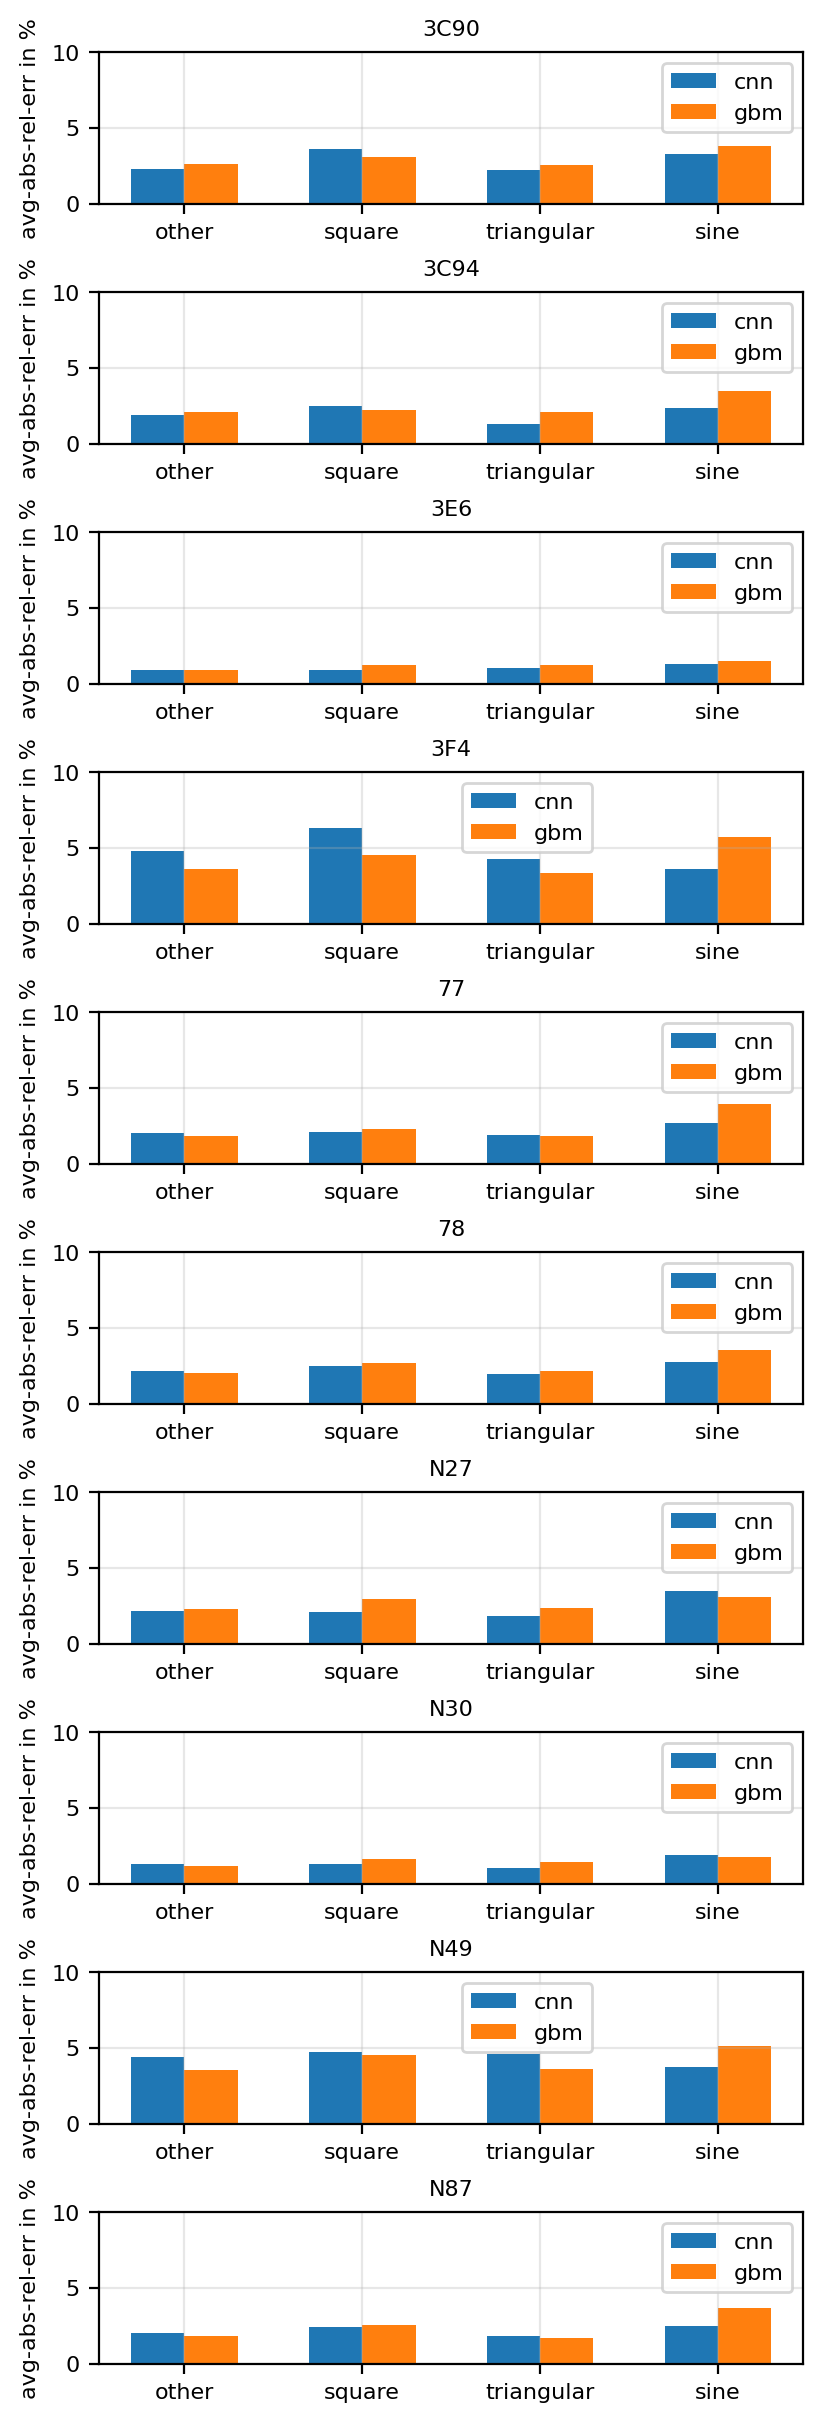

In [70]:
plt.rcParams.update({'font.size': 8})
files_in_destination = os.listdir(DATA_SOURCE)
wav_labels = ["other", "square", "triangular", "sine"]

fig, ax = plt.subplots(nrows=10, ncols=1, layout='constrained', figsize=(4,12))
x = np.arange(len(wav_labels))
w = 0.3

for col, filename in enumerate(files_in_destination):
    df = pd.read_csv(os.path.join(DATA_SOURCE, filename))
    wav_abs_errors_cnn = [0, 0, 0, 0]
    wav_abs_errors_gbm = [0, 0, 0, 0]
    for i, wav_label in enumerate(wav_labels):
        wav_label = "wav_" + wav_label
        metrics_cnn = calculate_metrics(pred=df.loc[df[wav_label]==1]["ploss_pred"], gtruth=df.loc[df[wav_label]==1]["p_derived_from_h"])
        wav_abs_errors_cnn[i] += metrics_cnn['avg-abs-rel-err']
        
        metrics_gbm = calculate_metrics(pred=df.loc[df[wav_label]==1]["ploss_pred"], gtruth=df.loc[df[wav_label]==1]["ploss"])
        wav_abs_errors_gbm[i] += metrics_gbm['avg-abs-rel-err']        

        # print(wav_label, metrics['avg-abs-rel-err'])

        # print(wav_labels, np.array((wav_abs_errors_cnn))/len(files_in_destination))
    ax[col].bar(x-w/2, 100*np.array(wav_abs_errors_cnn), width=w, align='center', label="cnn")

    # print(wav_labels, np.array((wav_abs_errors_gbm))/len(files_in_destination))
    ax[col].bar(x+w/2, 100*np.array(wav_abs_errors_gbm) , width=w,align='center', label="gbm")
    ax[col].set_xticks(x, wav_labels)
    ax[col].legend(bbox_to_anchor=(0.5, 0., 0.5, 1))
    ax[col].set_title(filename[0:-4].split('_')[3], fontsize=8)
    ax[col].set_ylabel('avg-abs-rel-err in %')
    ax[col].set_ylim(0, 10)


# plt.plot()
# print(df)

# Frequency


[]

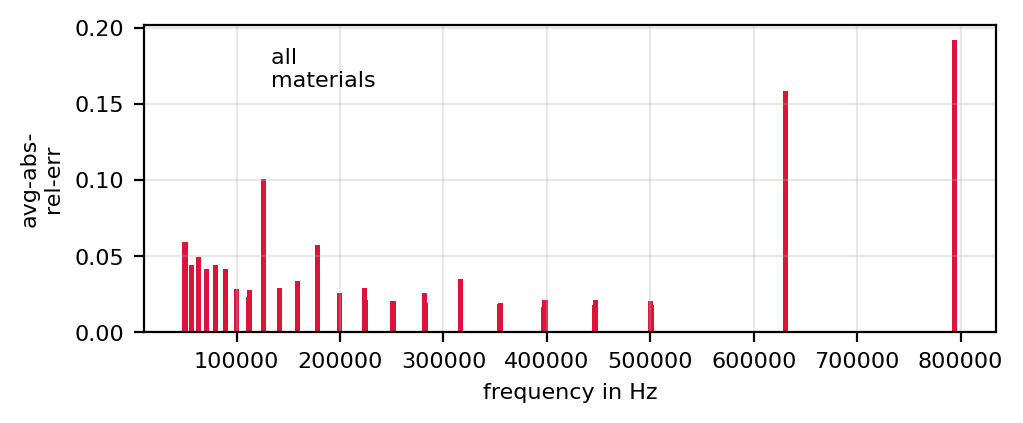

In [83]:
fig, axes = plt.subplots(layout='constrained', figsize=(5,2), sharex=False, sharey=False)
frequencies = data["temp"].unique()

for freq_lbl, freq_df in data.groupby("freq"):
    metrics_freq = calculate_metrics(pred=freq_df["ploss_pred"], gtruth=freq_df["ploss"])
    axes.bar(freq_lbl, metrics_freq['avg-abs-rel-err'], color="crimson", width=0.05e5, align='center')
axes.text(0.15, 0.8, s="all \nmaterials", transform=axes.transAxes )
axes.set_ylabel('avg-abs-\nrel-err')
axes.set_xlabel("frequency in Hz")
plt.plot()

[]

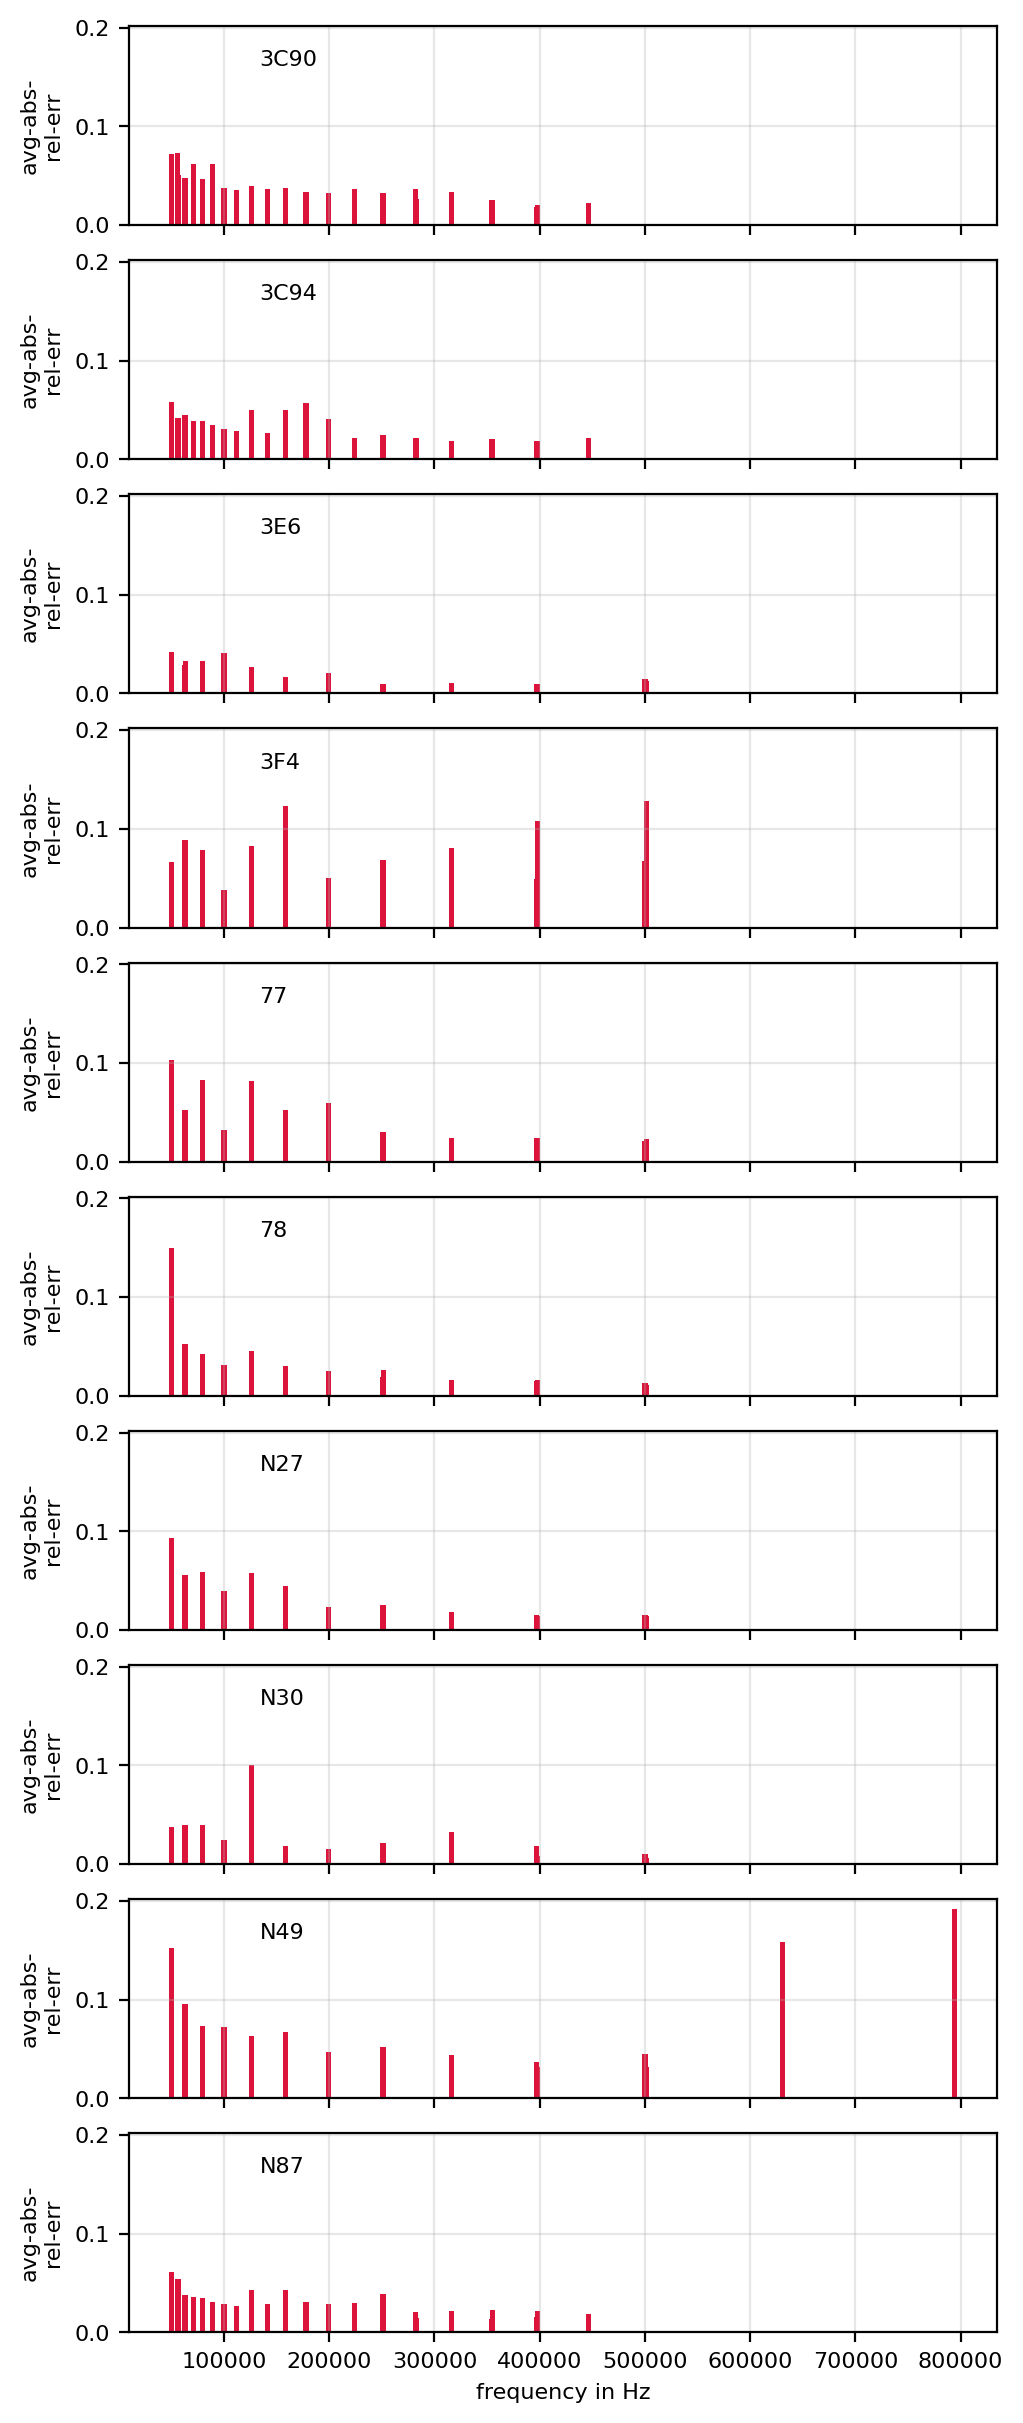

In [82]:
temperatures = data["temp"].unique()
materials = data["material"].unique()
fig, axes = plt.subplots(len(materials), layout='constrained', figsize=(5,12), sharex=True, sharey=True)

for ax, (mat_lbl, mat_df) in zip(axes, data.groupby("material")):
    ax.text(0.15, 0.8, s=mat_lbl, transform=ax.transAxes )
    for freq_lbl, freq_df in mat_df.groupby("freq"):
        metrics_freq = calculate_metrics(pred=freq_df["ploss_pred"], gtruth=freq_df["ploss"])
        ax.bar(freq_lbl, metrics_freq['avg-abs-rel-err'], color="crimson", width=0.05e5, align='center')
        ax.set_ylabel('avg-abs-\nrel-err')
axes[-1].set_xlabel("frequency in Hz")
axes[0].set_title("")
plt.plot()